La regresión logística no suele ser la mejor opción para problemas de clasificación de imágenes debido a las siguientes razones:

Limitaciones en la capacidad de modelado: La regresión logística es un modelo lineal, lo que significa que tiene una capacidad limitada para modelar relaciones complejas y no lineales entre las características y las etiquetas de clase. Las imágenes, especialmente aquellas que contienen patrones visuales complejos, como las de hojas de maíz enfermas, a menudo requieren modelos más expresivos, como las CNN.

Preprocesamiento de datos: Para aplicar la regresión logística a un problema de clasificación de imágenes, tenemos que convertir las imágenes en vectores de características unidimensionales, lo que podría resultar en una pérdida de información espacial. Las CNN, por otro lado, están diseñadas para trabajar con imágenes y pueden capturar información espacial de manera eficiente a través de convoluciones.

Dicho esto, podemos probar la regresión logística para el problema, y verificar la precisión.

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

def load_images_from_folder(folder):
    images = []
    labels = []
    for class_label, class_name in enumerate(os.listdir(folder)):
        class_folder = os.path.join(folder, class_name)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                img_path = os.path.join(class_folder, filename)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                img = cv2.resize(img, (256, 256))  # Redimensionar la imagen
                img = img.flatten()  # Convertir la imagen en un vector unidimensional
                images.append(img)
                labels.append(class_label)
    return np.array(images), np.array(labels)

DATASET_PATH = "archive/data"

# Cargar las imágenes y las etiquetas
X, y = load_images_from_folder(DATASET_PATH)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=5000, multi_class="multinomial")
model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.78      0.77       258
           1       0.92      0.92      0.92       254
           2       0.52      0.42      0.47       104
           3       0.91      0.96      0.93       222

    accuracy                           0.82       838
   macro avg       0.78      0.77      0.77       838
weighted avg       0.82      0.82      0.82       838



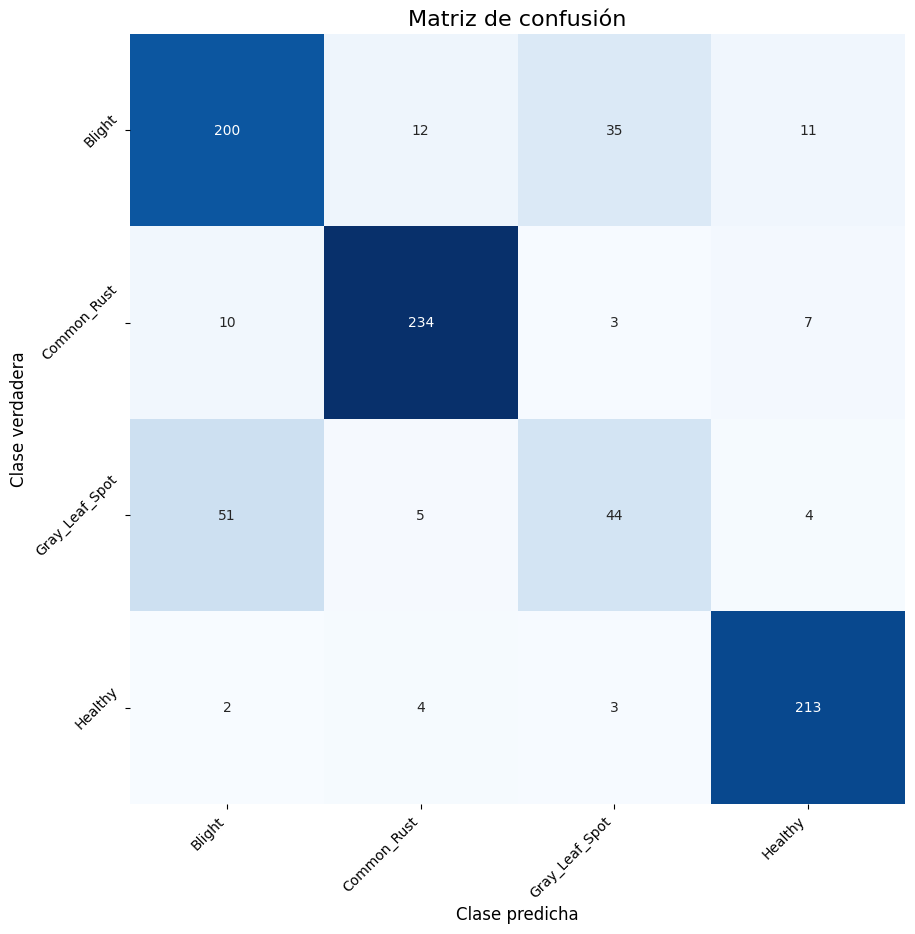

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names):
    matrix = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Clase predicha', fontsize=12)
    ax.set_ylabel('Clase verdadera', fontsize=12)
    ax.set_title('Matriz de confusión', fontsize=16)
    ax.set_xticklabels(class_names, rotation=45, ha='right', fontsize=10)
    ax.set_yticklabels(class_names, rotation=45, ha='right', fontsize=10)
    plt.show()

# Clases del problema
class_names = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

# Mostrar la matriz de confusión
plot_confusion_matrix(y_test, y_pred, class_names)

Es importante recordar que las CNN son generalmente una mejor opción para problemas de clasificación de imágenes que la regresión logística.